<a href="https://colab.research.google.com/github/pawara101/notebooks/blob/main/PyTorch/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer vision

---
## 0.Computer vision libs in PyTorch.
* use **Torchvision**
* `torchvision.datasets` - Get datasets and data loading functions
* `torchvision.models` - get pre-trained computer vision models
* `torchvision.transforms` - functions for manipulation your vision data to be suitable for use with an ML model.
* `torch.utils.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset


In [ ]:
import torch
from torch import nn

## Import TorchVision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## Check Versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1.Getting a dataset
* Using FashionMNIST Data-set

In [ ]:
## Setup Trainning Data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
[image,label]=train_data[0]

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
## Check the shapes
print(f"Image Shape : {image.shape}")
print(f"class label : {class_names[label]}")

Image Shape : torch.Size([1, 28, 28])
class label : Ankle boot


### 1.2 Visualising our Data

Image Shape : torch.Size([1, 28, 28])


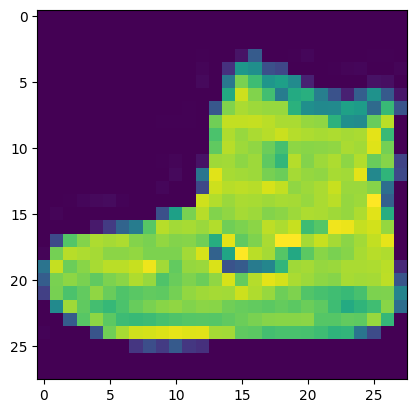

In [ ]:
image,label  = train_data[0]
print(f"Image Shape : {image.shape}")

plt.imshow(image.squeeze()) ## removes singular dimention

Text(0.5, 1.0, 'Ankle boot')

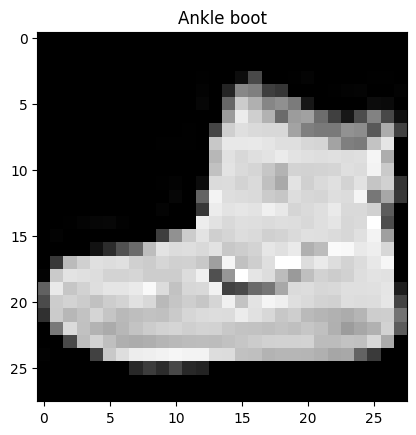

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

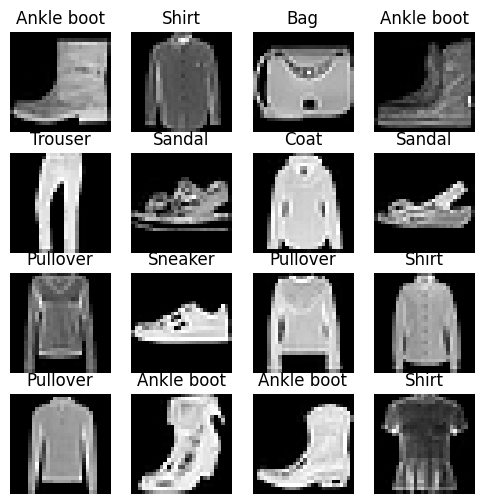

In [ ]:
## Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(6,6))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader
* DataLoader turns our dataset into a python iterable.
* We want to specifically we want turn our data inot mini batches.
    - why we are doing this ?
      - more efficient
      - gives neural network more chances to update its gradient per epoch.

In [ ]:
from torch.utils.data import DataLoader

## setup batch size
BATCH_SIZE = 32

## Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"Data Loaders : {train_dataloader,test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} Batches of {BATCH_SIZE}....")
print(f"Length of the test_dataloader: {len(test_dataloader)} Batches of {BATCH_SIZE}....")

Data Loaders : (<torch.utils.data.dataloader.DataLoader object at 0x7c8f9c4a6770>, <torch.utils.data.dataloader.DataLoader object at 0x7c8f9c4a6710>)
Length of the train_dataloader: 1875 Batches of 32....
Length of the test_dataloader: 313 Batches of 32....


In [ ]:
##t
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size : torch.Size([1, 28, 28])
Label : 6 ,Label Size : torch.Size([])


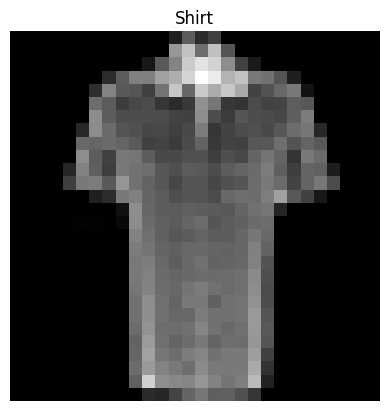

In [ ]:
## Show a Sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size : {img.shape}")
print(f"Label : {label} ,Label Size : {label.shape}")

## 3. Model 0 : Build a BaseLine Model
* When starting to build series of machine learning modelling experiments,as a practice start with a baseline model.


In [ ]:
## Create a flatten layer.
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# print out
print(f"Shape before flattening -> {x.shape}")
print(f"Shape afer flattening -> {output.shape}")

print(output)

Shape before flattening -> torch.Size([1, 28, 28])
Shape afer flattening -> torch.Size([1, 784])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0

In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )


  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    output_shape=len(class_names),
    hidden_units=10
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup Loss,Optimizer & Evaluation metrics
* Loss function - working with multiclass data using `nn.CrossEntropyLoss()`
* Optimizer - our optimizer will be `nn.torch.SGD()`
* Evaluation Metric.

In [ ]:
import requests
from pathlib import Path

## Download helper function
if Path("helper_functions.py").is_file():
  print("helper_functions.py exists")

else:
  print("Downloading helper_functions.py")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py exists


In [ ]:
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### 3.2 Create a function to time the experiment
Need to track :
1. Model's performance.
2. How fast it runs.


In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device=None):
  total_time = end - start

  print(f"Train Time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()

end_time = timer()

print_train_time(start=start_time,end=end_time,device="cpu")

Train Time on cpu: 0.000 seconds


4.857400017499458e-05

### 3.3 Creating a Trainning Loop and Trainnig model
1. Loop through epochs.
2. Loop through trainning batches, perform trainning steps, calculate the train loss.
3. Loop through test batches, perform trainning steps, calculate the train loss.
4. print whats happening.
5. count the time

In [ ]:
from tqdm.auto import tqdm

## set the seed
torch.manual_seed(42)
train_time_start_on_cpu = timer()

## Set number of epochs
epochs = 3

## Create
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n----------")

  ## Trainning
  train_loss = 0

  ## Add a loop to loop thorugh the trainning batches.
  for batch ,(X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1.Forward pass
    y_pred = model_0(X)

    # 2.Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss +=loss

    # 3.Optimizer
    optimizer.zero_grad()

    # 4.Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Print

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      #. 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))


    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy
    test_acc /= len(test_dataloader)



  # print
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch : 1
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch : 2
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train Time on cpu: 43.908 seconds


## 4. Make predictions and get model_0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):

  loss,acc =0,0

  model.eval()


  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      y_pred = model(X)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

      ##
      loss /= len(data_loader)
      acc /= len(data_loader)



  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc}


## Calculate model0 results
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)


model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

## 5. Setup device agnostic-code (for GPU using is there is one)

In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

In [ ]:
# create a model with non linear & linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape: int,hidden_units: int,output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
## Create an instance of model_1
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_names))
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

### 6.1 Setup Loss,optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing trainning and evaluation /testing loops
let's create a function for:
* training loop - `train_step()`
* testing loop - `test_loop()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train Time on cpu: 32.405 seconds


> **Note :** sometimes depending on hardware you fine cpu is faster than gpu.
>
>1. hardware in CPU has better than GPU.
>


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

In [ ]:

## Calculate model0 results
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)


model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.0012777427909895778,
 'model_acc': 0.28032041221337156}

In [ ]:
from logging import logProcesses
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
               device=device):

  loss,acc =0,0

  model.eval()


  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X = X.to(device)
      y = y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

      ##
      loss /= len(data_loader)
      acc /= len(data_loader)



  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc}

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.0012777427909895778,
 'model_acc': 0.28032041221337156}

## Model 2: Building a Convolutional Neural Network(CNN)

check [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

In [ ]:
## Create a Convolutional neural Network.
## Tiny VGG network
class FashionMNISTModelV2(nn.Module):

  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        ## Conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1 {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2 {x.shape}")
    x = self.classifier(x)

    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, ## colour channels
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

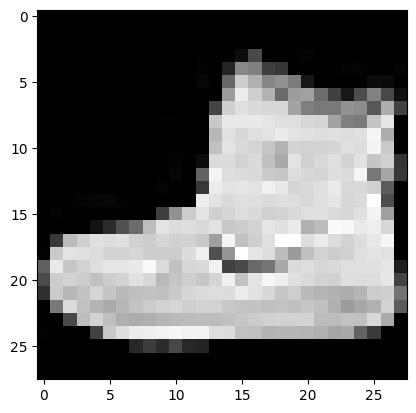

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')

In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.1 Stepping through `nn.Conv2d()`
see the documentation for more information.

In [ ]:
torch.manual_seed(42)

# Create batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image Batch Shape : {images.shape}")
print(f"Single Image Shape : {test_image.shape}")
print(f"Test Image:\n {test_image}")

Image Batch Shape : torch.Size([32, 3, 64, 64])
Single Image Shape : torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [ ]:
torch.manual_seed(42)
## Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# pass the data through convulution layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
         [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
         [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
         ...,
         [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
         [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
         [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

        [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
         [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
         [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
         ...,
         [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
         [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
         [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

        [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
         [-0.5791,  0.4414,  0.5100,  ...,  0

In [ ]:
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
## Print out original image shape
print(f"Test Image original shape :{test_image.shape}")
print(f"Test image with unsqueezed dimensions :{test_image.unsqueeze(0).shape}")

## Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

## Pass through the conv layer
test_image_thorugh_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after gping through conv_layer() :{test_image_thorugh_conv.shape}")

## Pass thorugh the max pool layer
test_image_thorugh_conv_and_max_pool =  max_pool_layer(test_image_thorugh_conv)
print(f"Shape after gping through conv_layer() and max_pool_layer() : {test_image_thorugh_conv_and_max_pool.shape}")

Test Image original shape :torch.Size([3, 64, 64])
Test image with unsqueezed dimensions :torch.Size([1, 3, 64, 64])
Shape after gping through conv_layer() :torch.Size([1, 10, 64, 64])
Shape after gping through conv_layer() and max_pool_layer() : torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
## Create a Random tensor
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor :\n {random_tensor}")
print(f"Max pool tensor shape: {random_tensor.shape}")
# Create a maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max pool Tensor :\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor :
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Max pool tensor shape: torch.Size([1, 1, 2, 2])

 Max pool Tensor :
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 setup a loss function and optimizer for `model_2`

In [ ]:
## Setup loss function
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

### 7.4 Trainning and Testing `model_2` using our trainning and testing functions.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs =3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
-----
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
-----
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Train Time on cpu: 161.228 seconds


In [ ]:
model_2_resuls = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_2_resuls

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0006759435054846108,
 'model_acc': 0.320257331366464}

## 8. Compare model results and Trainning time.

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_resuls]
                               )

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.001061,0.300289
1,FashionMNISTModelV1,0.001278,0.280320
2,FashionMNISTModelV2,0.000676,0.320257


In [ ]:
## Add trainning times to comparison
compare_results["trainning time"] = [total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,trainning time
0,FashionMNISTModelV0,0.001061,0.300289,43.907771
1,FashionMNISTModelV1,0.001278,0.280320,32.404713
2,FashionMNISTModelV2,0.000676,0.320257,161.228496


<Axes: ylabel='model_name'>

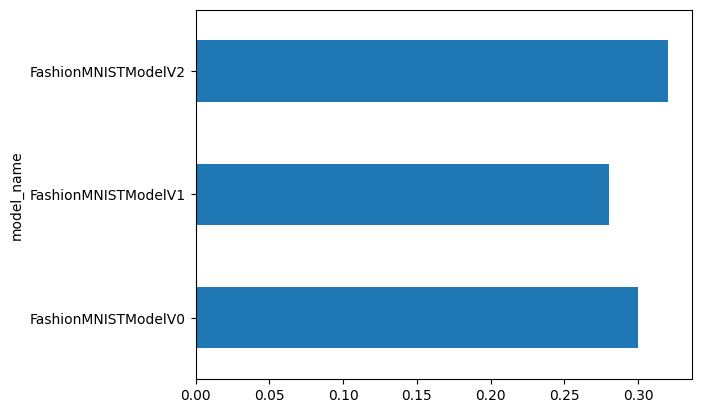

In [ ]:
## Visualize model results
compare_results.set_index('model_name')["model_acc"].plot(kind='barh')

## 9. Make and evaluate random predictions with best model.

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device =device):
  pred_probs = []
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:

      sample = torch.unsqueeze(sample,dim=0).to(device)

      ## Forward pass
      pred_logit = model(sample)

      ## Get prediction probablility
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())

## Stack the pred_prob to turn list into tensor

  return torch.stack(pred_probs)

In [ ]:
img,label = test_data[0][:10]

img.shape,label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
#random.seed(42)
test_sample =[]
test_labels =[]

for sample,label in random.sample(list(test_data),k=9):
  test_sample.append(sample)
  test_labels.append(label)


test_sample[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

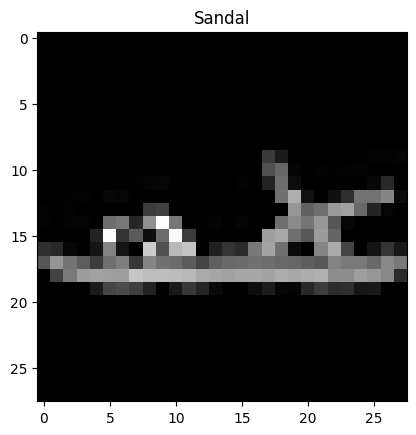

In [ ]:
plt.imshow(test_sample[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
## Make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_sample)

## View first two prediction probababilities
pred_probs[:2]

tensor([[6.6894e-06, 9.1266e-07, 5.1919e-05, 3.8937e-06, 1.8903e-05, 9.9435e-01,
         3.7804e-06, 1.2892e-03, 4.2759e-03, 1.4546e-06],
        [7.7171e-04, 9.9874e-01, 7.3228e-06, 2.6324e-04, 5.0479e-05, 1.3674e-05,
         1.1754e-04, 3.2433e-06, 2.7896e-05, 5.5978e-07]])

In [ ]:
## Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 3, 6, 0, 7, 1, 1, 7])

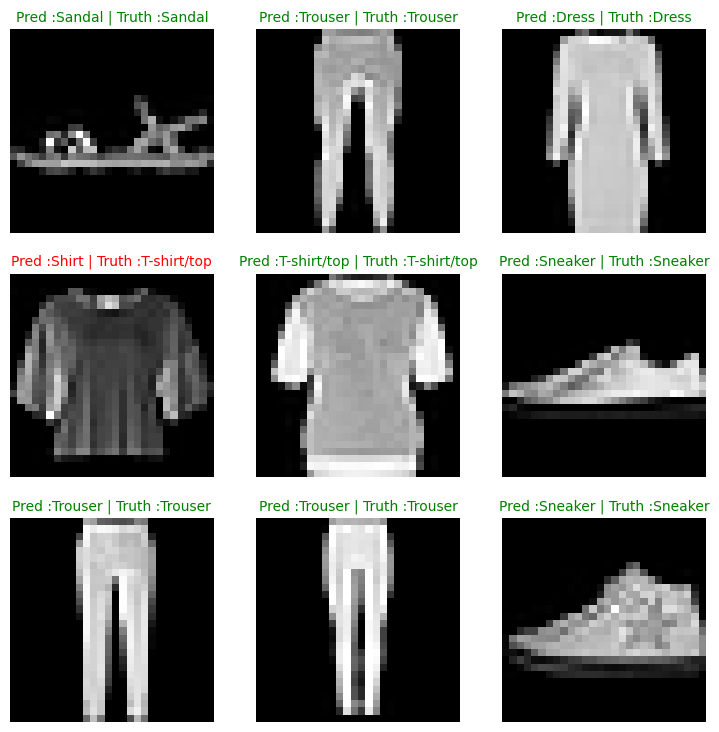

In [ ]:
## Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i,sample in enumerate(test_sample):
  ## Create subpplot
  plt.subplot(nrows,ncols,i+1)

  plt.imshow(sample.squeeze(),cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred :{pred_label} | Truth :{truth_label}"


  if pred_label== truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")

  plt.axis(False)

## 10. Making confusion matrix for further classification evaluation.

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matric using `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [202]:
import tqdm.auto
from tqdm.auto import tqdm

# make predictions with trained model
y_preds=[]
model_2.eval()

with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Predictions...."):
    # send the data and targets to target device
    X,y = X.to(device),y.to(device)

    # foreard pass
    y_logit = model_2(X)

    ## Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

    ## Put predictions on CPU
    y_preds.append(y_pred.cpu())


## Concatenate list of predictions into a tensor.
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

print(len(y_pred_tensor))

Making Predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

10000


In [200]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [209]:
## check

try:
  import torchmetrics
  import mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics
  import mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


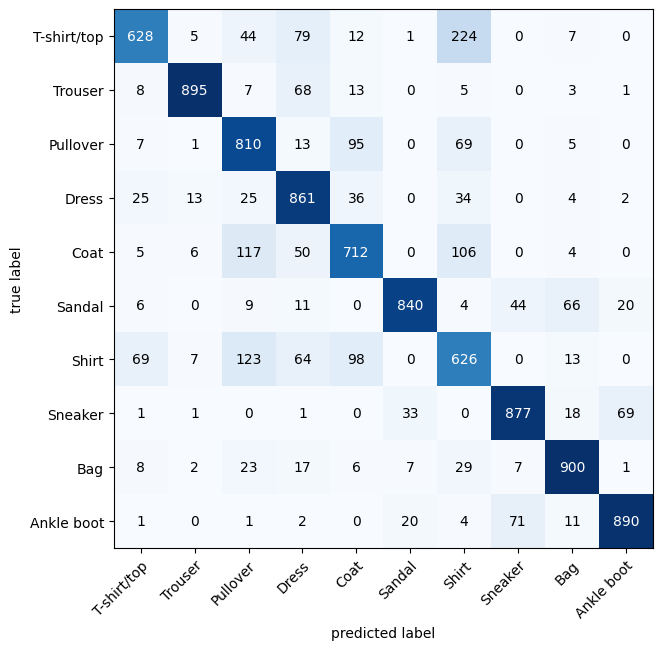

In [211]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare prdictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

# 3. plot the confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

## 11. Save and load the pytorch model.

In [213]:
from pathlib import Path

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/03_pytorch_computer_vision.pth


In [214]:
## Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# load the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [215]:
model_2_resuls

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0006759435054846108,
 'model_acc': 0.320257331366464}

In [216]:
## Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0006759435054846108,
 'model_acc': 0.320257331366464}

In [219]:
## check if the model results are close to each other
torch.isclose(torch.tensor(model_2_resuls["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)